In [1]:
import numpy as np
import logging
import sys
from matplotlib import pyplot as plt

%matplotlib inline
logging.basicConfig(
    format="%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.INFO,
)
sys.path.append("../")

import torch
from torch.nn import MSELoss
from torchvision.datasets import MNIST
from torchvision import transforms

from aef.models.aef import Autoencoder
from aef.trainer import AutoencoderTrainer


## Data

In [2]:
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

mnist = MNIST('./data', download=True, transform=img_transform)

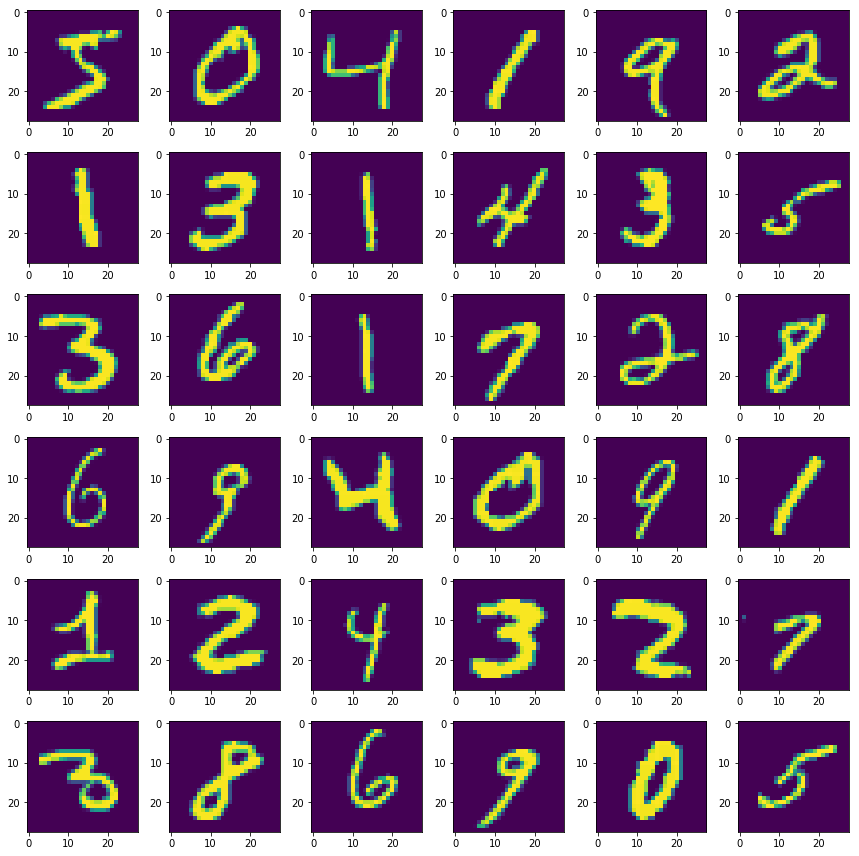

In [3]:
fig = plt.figure(figsize=(12,12))

for i in range(36):
    ax = plt.subplot(6, 6, i + 1)
    img, _ = mnist[i]
    plt.imshow(img.reshape((28,28)))
        
plt.tight_layout()
plt.show()

## Losses

In [ ]:
def nll(x_pred, x_true, log_p):
    return - torch.mean(log_p)


def mse(x_pred, x_true, log_p):
    return MSELoss()(x_pred, x_true)


## Train autoencoder

In [ ]:
ae = Autoencoder(n_mades=3, latent_dim=2)
ae_trainer = AutoencoderTrainer(ae)

In [ ]:
ae_trainer.train(
    dataset=mnist,
    loss_functions=[mse, nll],
    loss_weights=[1., 0.01],
    loss_labels=["MSE"],
    batch_size=256,
    epochs=1,
)

## Visualize latent space

In [ ]:
x, y = mnist[:1000]
u = ae.latent(x)

In [ ]:
x = x.numpy()
y = y.numpy()
u = u.numpy()

In [ ]:
fig = plt.figure(figsize=(5,5))

for i in range(10):
    plt.scatter(u[y==i][:,0], u[y==i][:,0], c="C{}".format(i), s=20., label="{}".format(i+1))
    
plt.legend()
plt.tight_layout()
plt.show()
